In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/bryanleavelle/Bootcamp/Immersion/ch 4/DD-MM-2020 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'big_and_beautiful.pkl'))

# HISTOGRAM
<br> create histogram for hours orders are made

In [4]:
#first make sure i have the right column name

for col in df:
    print (col)

order_id
user_id
order_number
order_day_of_week
hour_of_order
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
price_range_loc
busiest_days
busiest_period_of_day
max_order
loyalty_flag
avg_order
spender_category
spender_flag_loc
customer_order_frequency
first_name
last_name
gender
state
age
date_joined
n_dependants
fam_status
income
_merge


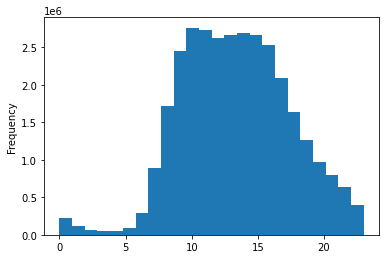

In [5]:
histo = df['hour_of_order'].plot.hist(bins = 24)

Least amount of sales made before around 6. Sales peak between about 10 and 15, then begin to drop off again from there.

# LOYALTY FLAG BAR CHART<br>
since each item sale will also have a loyalty flag attached to, value counts on loyalty categories should be fine

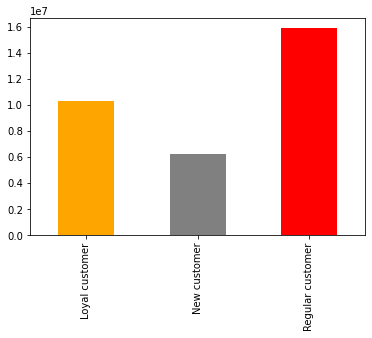

In [6]:
bar = df['loyalty_flag'].value_counts().sort_index().plot.bar(color = ['orange', 'gray', 'red'])

# PRICES AND TIME OF DAY

first thing to do: make a smaller random sample to pull from so I finish this course sometime this century

In [7]:
# split the data randomly 70/30 as per previous excercise

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [8]:
# assign the two different data sets to DF

big = df[dev]
small = df[~dev]

In [9]:
# test that it worked. First, size of whole data set
len(df)

32404859

In [10]:
#size of two sets combined

len(big) + len(small)

32404859

we have a match. Now further simplify the data by only including the time of day and prices

In [11]:
# new DF including only hour_of_order and prices

line_df = small[['hour_of_order', 'prices']]

In [12]:
# work check

line_df.head()

,hour_of_order,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


NOICE

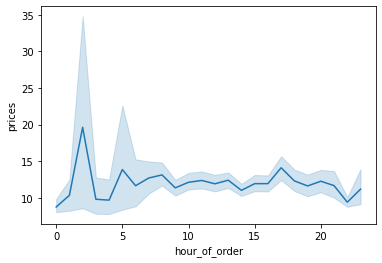

In [13]:
# NOW FOR THE LINE GRAPH

line = sns.lineplot(data = line_df, x = 'hour_of_order', y = "prices")

Ha! people buy expensive stuff in the wee hours of the morning. Would love to find a correlation with when people start drinkin'

# DEMOGRAPHICS LINE CHART

In [14]:
# create a new df with age and n_dependents with small DF

df_age_dep = small[['age','n_dependants']]

In [15]:
df_age_dep.head()

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


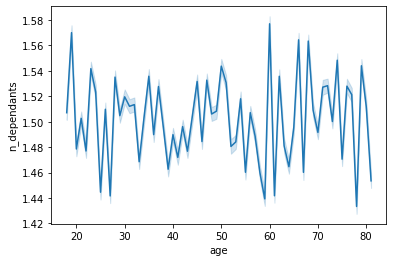

In [16]:
line_2 = sns.lineplot(data = df_age_dep, x = 'age', y = "n_dependants")

there are kind of peaks at around 20 years old and 60. Not sure how to interperate without some kind of trend line. actually... scatter might be better?

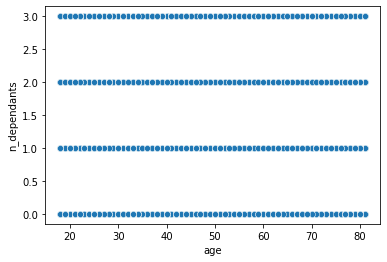

In [17]:
kid_scatter = sns.scatterplot(data = df_age_dep, x = 'age', y = "n_dependants")

nope!

# SCATTER PLOT <br>
age vs income

In [18]:
# new df containing only age and income

df_bp = small[['age','income']]

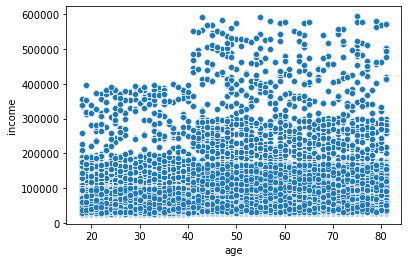

In [24]:
#seaborn scatter plot

scatter = sns.scatterplot(x = 'age', y = 'income', data = df_bp)

seems like income increases with age, but a trendline would be better. Im gonna try matplotlib:

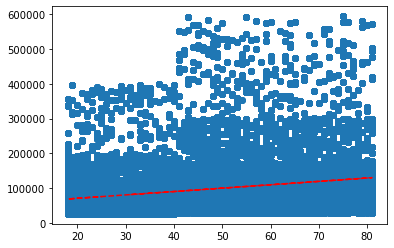

In [22]:
#matplotlib scatter

data = df_bp[['age', 'income']]
x = data['age']
y = data['income']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()



That looks better! seems more obvious that income increases with age.

# EXPORT CHARTS



In [23]:
histo.figure.savefig(os.path.join(path, 'Data', 'histo_final.png'))

In [25]:
line.figure.savefig(os.path.join(path, 'Data', 'line1.png'))